In [139]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import lagrange
from scipy.optimize import minimize_scalar
sns.set_style('dark')
np.set_printoptions(suppress=True)
#1
#Побудова поліному Лагранжа
x = [1, 1.4, 1.8, 2.2, 2.6]
y = [-1, -3, -3.25, -2.75, -2.9]
z = sp.Symbol('z') #змінна для поліному
#Рахуємо багаточлени Р0 - P4 - це наші поліноми у вигляді формул, р0_coeffs - p4_coeffs - коефіцієнти при поліномах
P0 = ((z-x[1])*(z-x[2])*(z-x[3])*(z-x[4]))/((x[0]-x[1])*(x[0]-x[2])*(x[0]-x[3])*(x[0]-x[4]))
p0_coeffs = list(reversed(sp.Poly(sp.expand(P0), z).coeffs()))
print(f'P_0 = {sp.expand(P0)}\nKоефіцієнти: {p0_coeffs}')
P1 = ((z-x[0])*(z-x[2])*(z-x[3])*(z-x[4]))/((x[1]-x[0])*(x[1]-x[2])*(x[1]-x[3])*(x[1]-x[4]))
p1_coeffs = list(reversed(sp.Poly(sp.expand(P1), z).coeffs()))
print(f'P_1 = {sp.expand(P1)}\nKоефіцієнти: {p1_coeffs}')
P2 = ((z-x[0])*(z-x[1])*(z-x[3])*(z-x[4]))/((x[2]-x[0])*(x[2]-x[1])*(x[2]-x[3])*(x[2]-x[4]))
p2_coeffs = list(reversed(sp.Poly(sp.expand(P2), z).coeffs()))
print(f'P_2 = {sp.expand(P2)} \nКоефіцієнти: {p2_coeffs}')
P3 = ((z-x[0])*(z-x[1])*(z-x[2])*(z-x[4]))/((x[3]-x[0])*(x[3]-x[1])*(x[3]-x[2])*(x[3]-x[4]))
p3_coeffs = list(reversed(sp.Poly(sp.expand(P3), z).coeffs()))
print(f'P_3 = {sp.expand(P3)} \nКоефіцієнти: {p3_coeffs}')
P4 = ((z-x[0])*(z-x[1])*(z-x[2])*(z-x[3]))/((x[4]-x[0])*(x[4]-x[1])*(x[4]-x[2])*(x[4]-x[3]))
p4_coeffs = list(reversed(sp.Poly(sp.expand(P4), z).coeffs()))
print(f'P_4 = {sp.expand(P4)} \nКоефіцієнти: {p4_coeffs}')

P_0 = 1.62760416666667*z**4 - 13.0208333333333*z**3 + 38.4114583333333*z**2 - 49.4791666666667*z + 23.4609375
Kоефіцієнти: [23.4609375000000, -49.4791666666667, 38.4114583333333, -13.0208333333333, 1.62760416666667]
P_1 = -6.51041666666666*z**4 + 49.4791666666666*z**3 - 136.458333333333*z**2 + 160.520833333333*z - 67.03125
Kоефіцієнти: [-67.0312500000000, 160.520833333333, -136.458333333333, 49.4791666666666, -6.51041666666666]
P_2 = 9.76562499999999*z**4 - 70.3125*z**3 + 182.03125*z**2 - 199.6875*z + 78.2031249999999 
Коефіцієнти: [78.2031249999999, -199.687500000000, 182.031250000000, -70.3125000000000, 9.76562499999999]
P_3 = -6.51041666666666*z**4 + 44.2708333333333*z**3 - 108.333333333333*z**2 + 113.229166666667*z - 42.65625 
Коефіцієнти: [-42.6562500000000, 113.229166666667, -108.333333333333, 44.2708333333333, -6.51041666666666]
P_4 = 1.62760416666667*z**4 - 10.4166666666667*z**3 + 24.3489583333333*z**2 - 24.5833333333333*z + 9.0234375 
Коефіцієнти: [9.02343750000000, -24.583333

In [140]:
#Формула для побудови поліному Лагранжа
pol = 0
for i in range(5):
    num = sp.prod([(sp.Symbol('z') - x[j])/(x[i] - x[j]) for j in range(5) if j != i])
    pol += y[i]*num
print(f'Поліном Лагранжа: \n{sp.expand(pol)}')

Поліном Лагранжа: 
-0.651041666666672*z**4 + 1.56250000000005*z**3 + 6.66666666666647*z**2 - 23.1875*z + 14.6093749999999


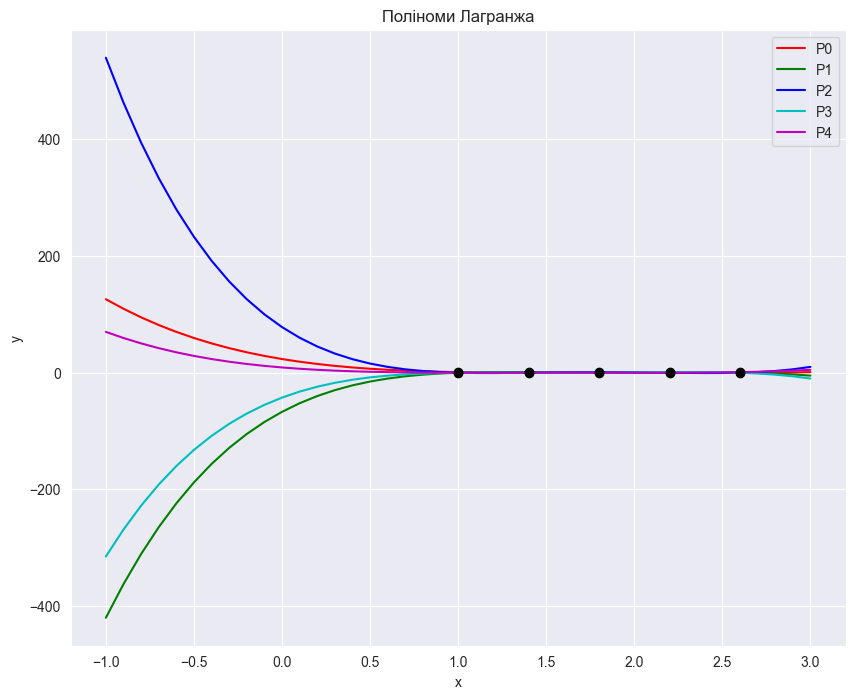

In [141]:
#Будуємо наші поліноми на графіку
P_0 = np.polynomial.Polynomial(p0_coeffs)
P_1 = np.polynomial.Polynomial(p1_coeffs)
P_2 = np.polynomial.Polynomial(p2_coeffs)
P_3 = np.polynomial.Polynomial(p3_coeffs)
P_4 = np.polynomial.Polynomial(p4_coeffs)
x_new = np.arange(-1.0, 3.1, 0.1)
fig = plt.figure(figsize=(10, 8))
plt.plot(x_new, P_0(x_new), 'r', label= 'P0')
plt.plot(x_new, P_1(x_new), 'g', label= 'P1')
plt.plot(x_new, P_2(x_new), 'b', label= 'P2')
plt.plot(x_new, P_3(x_new), 'c', label= 'P3')
plt.plot(x_new, P_4(x_new), 'm', label= 'P4')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Поліноми Лагранжа')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Поліном Лагранжа: 14.6093750000001 - 23.1875000000001 x + 6.66666666666664 x**2 +
1.56250000000000 x**3 - 0.651041666666669 x**4


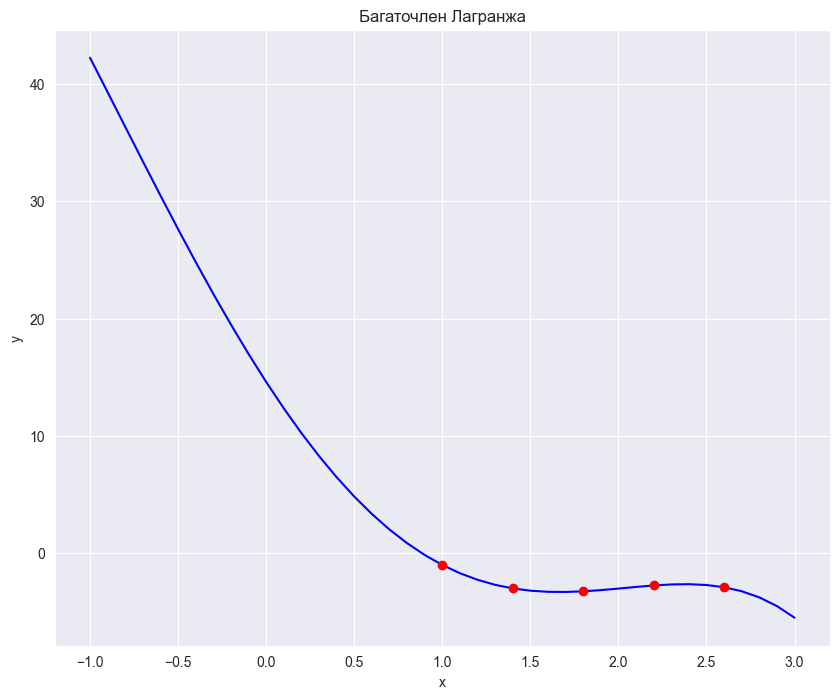

In [142]:
L = -P_0 - 3*P_1 - 3.25*P_2 - 2.75*P_3 - 2.9*P_4 #Поліном Лагранжа
print(f'Поліном Лагранжа: {L}')
#Будуємо графік багаточлена Лагранжа
fig1 = plt.figure(figsize=(10, 8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Багаточлен Лагранжа')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Багаточлен Лагранжа: 
        4         3         2
-0.651 x + 1.563 x + 6.667 x - 23.19 x + 14.61


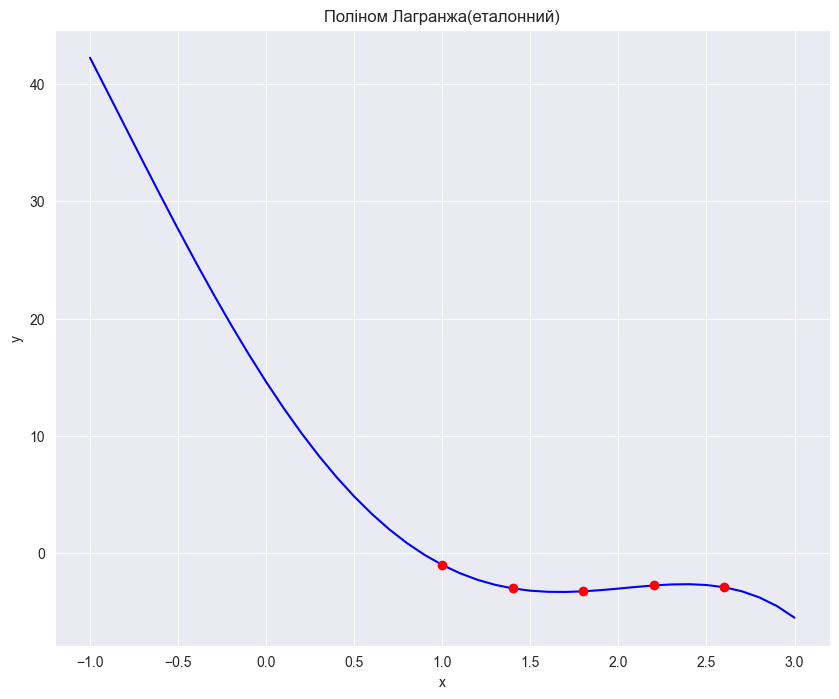

In [143]:
#Звіряємось із вбудованою функцією
f = lagrange(x, y)
print(f'Багаточлен Лагранжа: \n{f}')
fig2 = plt.figure(figsize=(10, 8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title("Поліном Лагранжа(еталонний)")
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [144]:
del x_new
x_new = [1, 1.2, 1.4, 1.6 ,1.8, 2, 2.2, 2.4 ,2.6, 2.8] #крок 0.4 - зменшимо крок до 0.2
y_new = [L(i) for i in x_new] #Визначимо значення y_i автоматично
print(f'Значення у середніх точках кожного відрізку: {[y_new[i] for i in range(len(y_new)) if i%2 != 0]}')
# y_new = [-1, -2.27 ,-3, -3.29, -3.25, -3.02 ,-2.75, -2.64 ,-2.9]
pol = 0
#Будуємо інтерполяційний поліном на 10 точках
for i in range(len(x_new)):
    num = sp.prod([(sp.Symbol('z') - x_new[j])/(x_new[i] - x_new[j]) for j in range(len(x_new)) if j != i])
    pol += y_new[i]*num
print(f'Поліном Лагранжа зі збільшеною кількістю вузлів: \n{sp.expand(pol)}')

Значення у середніх точках кожного відрізку: [-2.26562500000012, -3.29062500000020, -3.01562500000030, -2.64062500000041, -3.76562500000054]
Поліном Лагранжа зі збільшеною кількістю вузлів: 
2.27373675443232e-12*z**9 - 4.00177668780088e-11*z**8 + 2.61934474110603e-10*z**7 - 1.16415321826935e-9*z**6 + 2.3283064365387e-9*z**5 - 0.65104167163372*z**4 + 1.56250000558794*z**3 + 6.6666666646488*z**2 - 23.1874999983702*z + 14.609374999709


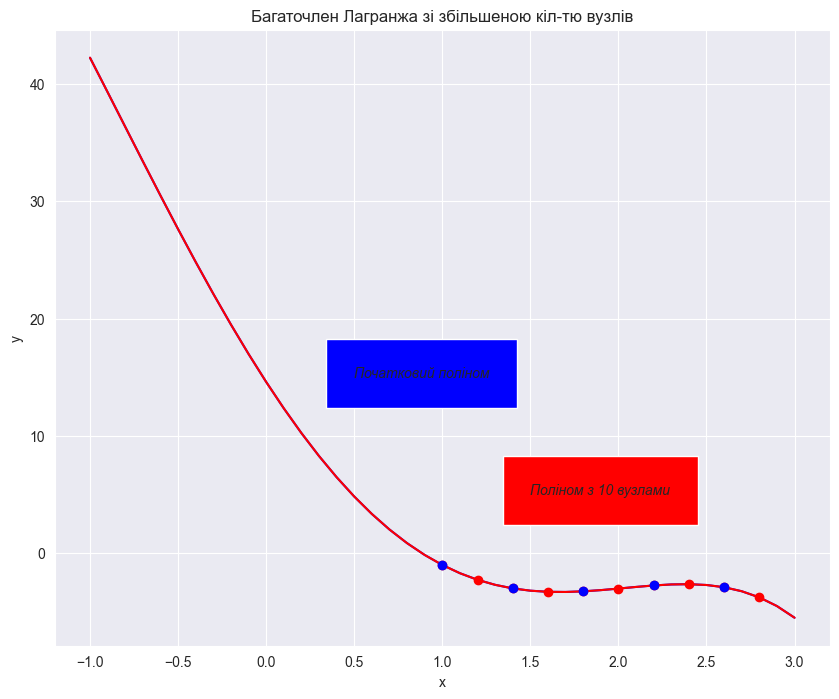

In [145]:
z = sp.Symbol('z')
ivl = np.arange(-1.0, 3.1, 0.1)
#Будуємо Polynom для графіку
pol_ivl_raw = sp.Poly(sp.expand(pol), z)
pol_coeffs = list(reversed(pol_ivl_raw.coeffs()))
pol_ivl = np.polynomial.Polynomial(pol_coeffs)
#Графік
fig1 = plt.figure(figsize=(10, 8))
ax = fig1.add_subplot()
plt.plot(ivl, pol_ivl(ivl), 'b', x_new, y_new, 'ro') #Графік поліному зі збільшеною кіл-тю вузлів, нові вузли замальовані червоним
plt.plot(ivl, L(ivl), 'r', x, y, 'bo') #Початковий поліном, початкові вузли із таблиці замальовані синім кольором
plt.title('Багаточлен Лагранжа зі збільшеною кіл-тю вузлів')
ax.text(0.5, 15, 'Початковий поліном', style='italic',
        bbox={'facecolor': 'blue', 'alpha': 1, 'pad': 20})
ax.text(1.5, 5, 'Поліном з 10 вузлами', style='italic',
        bbox={'facecolor': 'red', 'alpha': 1, 'pad': 20})
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [146]:
#[0.5, 1.5] - обраний інтервал, із якого побудуємо таблицю вузлів
del x
def f(x):
    return np.sqrt(x) + 1 - 1/x
ivl1 = [0.5, 1.5]
node_amount = 5
x = np.linspace(ivl1[0], ivl1[1], node_amount)
y = f(x)
print("  x  |  y")
for i in range(node_amount):
    print("{:.2f} | {:.2f}".format(x[i], y[i]))
y = list(y)
x = list(x)

  x  |  y
0.50 | -0.29
0.75 | 0.53
1.00 | 1.00
1.25 | 1.32
1.50 | 1.56


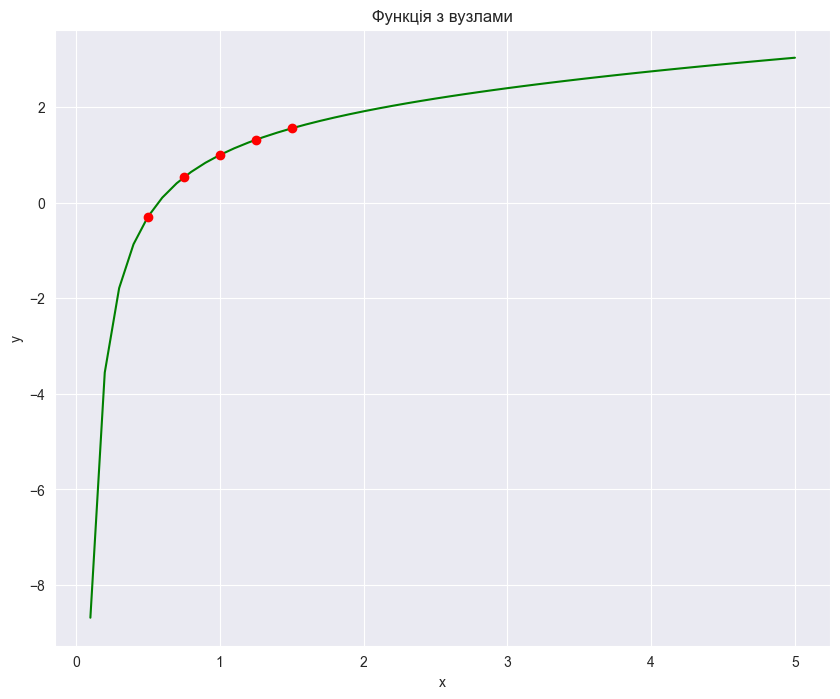

In [147]:
ivl = np.arange(0.1, 5.1, 0.1)
fig2 = plt.figure(figsize=(10, 8))
plt.plot(ivl, f(ivl), 'g', x, y, 'ro')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Функція з вузлами')
plt.show()

In [148]:
def dividedDiff(x, y):
    '''
    Функція для знаходження коефіцієнтів поліному Ньютона
    '''
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y #Перший стовпчик у
    for j in range(1, n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef
def newtonPoly(coef, x_data, x):
    """
    Визначення поліному Ньютона на певному інтервалі
    """
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k])*p
    return p

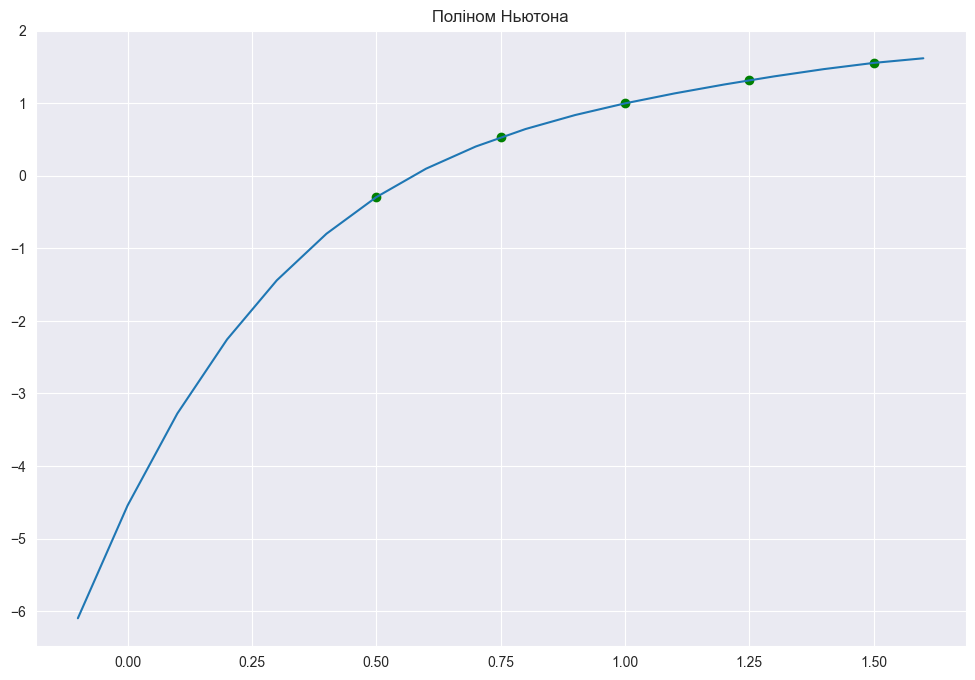

In [149]:
x = np.array(x)
y = np.array(y)
a_s = dividedDiff(x, y)[0, :]
x_new = np.arange(-0.1, 1.7, 0.1)
y_new = newtonPoly(a_s, x, x_new)
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'go')
plt.plot(x_new, y_new)
plt.title('Поліном Ньютона')
plt.grid()
plt.show()

In [150]:
#Виведемо поліном
def symbNewtonsPoly(coef, x_data):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (sp.Symbol('x') - x_data[n-k])*p
    return p
newPol = symbNewtonsPoly(a_s, x).expand()
print('Поліном Ньютона:')
newPol

Поліном Ньютона:


-1.46900534285366*x**4 + 7.37088850176556*x**3 - 14.4010121406384*x**2 + 14.0426347883453*x - 4.54350580661887

П'ята похідна: 
15*(8/x**6 + 7/(32*x**(9/2)))


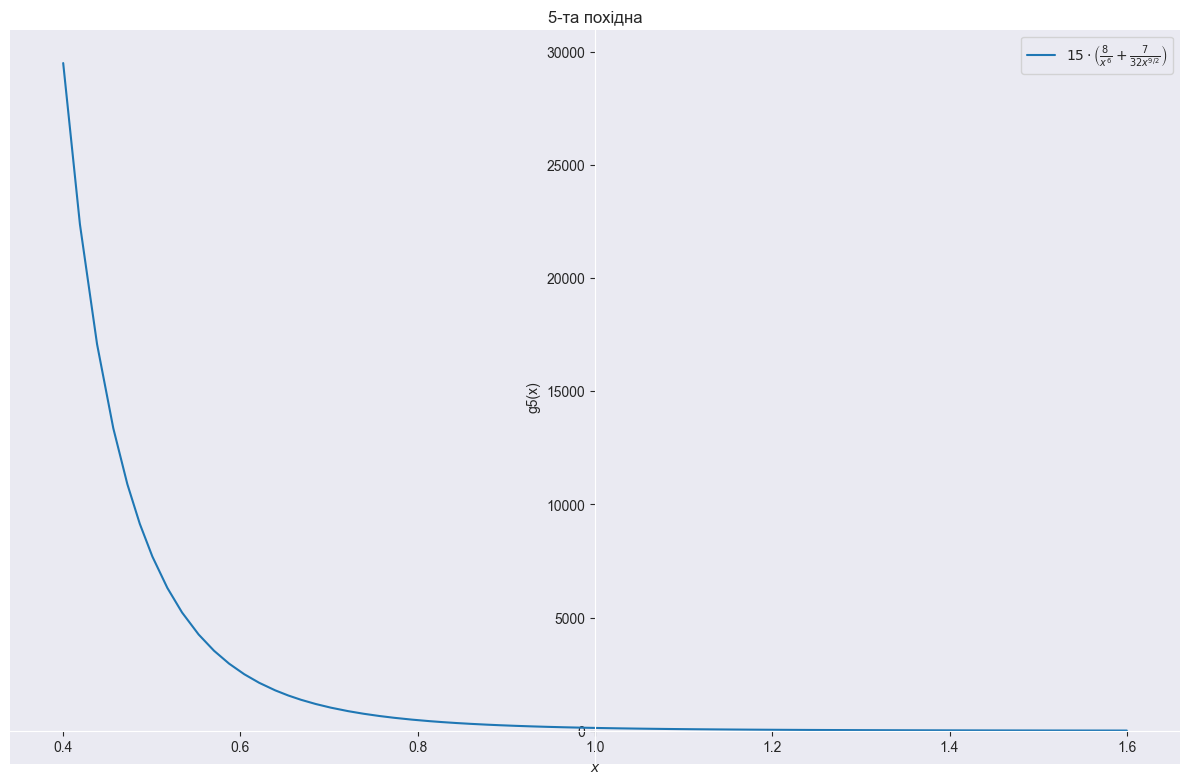

In [151]:
x = sp.Symbol('x', real=True)
g = sp.sqrt(x) + 1 - 1/x
g5 = sp.diff(g, x, 5)
print(f'П\'ята похідна: \n{g5}')
pl = sp.plot(g5, (x, 0.4, 1.6), show=False, grid= True, legend= True, title= '5-та похідна', ylabel='g5(x)', size=(12, 8))
pl.show()

In [152]:
h = sp.lambdify(x, g5)
minimum = minimize_scalar(h, bounds=(0.1, 1.5), method='bounded')
g5_min = abs(sp.maximum(g5, x, sp.Interval(0.5, 1.5)))
# g5_min = abs(minimum.fun)
print(f'Максимум 5-ої похідної: {g5_min}')

Максимум 5-ої похідної: 7754.24621202459


z**5 - 5.0*z**4 + 9.6875*z**3 - 9.0625*z**2 + 4.078125*z - 0.703125


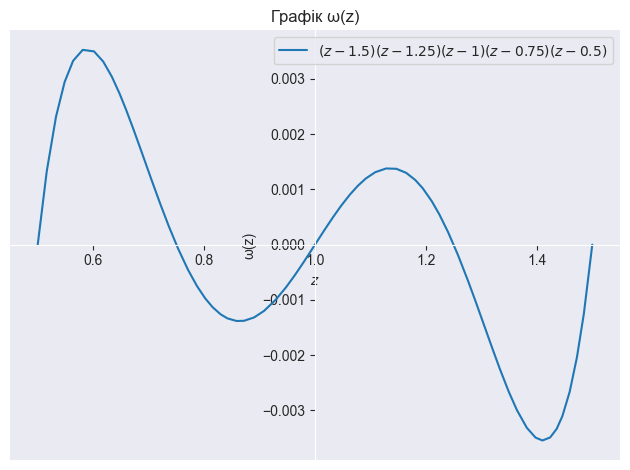

In [153]:
omega = 1
x = [0.5, 0.75, 1, 1.25, 1.5] #Таблиця вузлів з кроком 0.25
z = sp.Symbol('z')
omega = sp.prod(z-x[i] for i in range(len(x))) #Загальна формула для ω(х)
print(omega.expand())
pl1 = sp.plot(omega, (z, 0.5, 1.5), show=False, title='Графік \u03C9(z)', ylabel='\u03C9(z)', legend=True)
pl1.show()

In [165]:
om = sp.lambdify(z, omega)
omega_min = minimize_scalar(om, bounds=(0, 5), method='bounded')
omega_minimum = omega_min.fun
print(f'Мінімум \u03C9(х): {omega_minimum}')

Мінімум ω(х): -0.003546320516040951


In [169]:
ri = (g5_min*abs(omega_minimum))/120
print(f'Апріорна похибка: {ri}')

Апріорна похибка: 0.229158686901130


Вузли: 
[0.5, 0.75, 1.0, 1.25, 1.5] 
Значення функції: 
[-0.29289321881345254, 0.5326920704511053, 1.0, 1.3180339887498949, 1.5580782047249224]
Інтерполяційний поліном: -1.469*x**4 + 7.371*x**3 - 14.4*x**2 + 14.04*x - 4.544


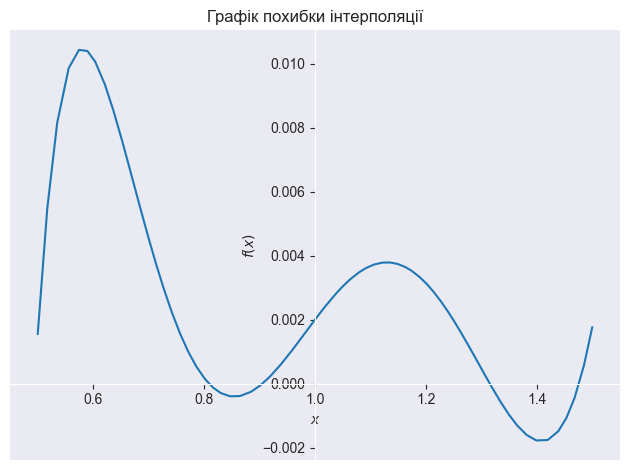

Апостеріорна помилка: 0.0104683616581913


In [172]:
#Апостеріорна похибка
from sympy.plotting.plot import MatplotlibBackend, Plot
def f(x):
    return np.sqrt(x) + 1 - 1/x
ivl1 = [0.5, 1.5]
node_amount = 5
x = np.linspace(ivl1[0], ivl1[1], node_amount)
y = f(x)
x = list(x)
y = list(y)
print(f'Вузли: \n{x} \nЗначення функції: \n{y}')
lpol = lagrange(x, y) #Інтерполяційний поліном із вбудованої функції
x = sp.Symbol('x', real = True)
lpol = -1.469*x**4 + 7.371*x**3 - 14.4*x**2 + 14.04*x - 4.544
print(f'Інтерполяційний поліном: {lpol}')
r = g - lpol #Похибка інтерполяції
x_new = np.linspace(ivl1[0], ivl1[1], node_amount)
def get_sympy_subplots(plot:Plot):
    backend = MatplotlibBackend(plot)
    backend.process_series()
    backend.fig.tight_layout()
    return backend.plt
pl2 = sp.plot(r, (x, 0.5, 1.5), title='Графік похибки інтерполяції', show=False)
pl2.show()
rmax = sp.maximum(r, x, sp.Interval(0.5, 1.5))
print(f'Апостеріорна помилка: {rmax}')

In [ ]:
#4
x4 = [1, 1.2, 1.4, 1.6 ,1.8, 2, 2.2, 2.4 ,2.6, 2.8]
y4 = [-1.00000000000008, -2.26562500000012, -3.00000000000016, -3.29062500000020, -3.25000000000025, -3.01562500000030, -2.75000000000036, -2.64062500000041, -2.90000000000048, -3.76562500000054]
m = 3
n = len(x4)
X = 0
b = []
s = np.zeros(2*(m+1))
for i in range(m+1):
    for j in range(n):
        X += (x4[i])**j/n
    b.append(X)
for i in range(len(s)):
    s[i] = sum([pow(x4[j], i)/n for j in range(n)])

In [158]:
A = []
i = 0
while i < len(s)/2:
    A.append([s[i+j] for j in range(m+1)])
    i += 1
sol = np.linalg.solve(A, b)
print(f'Коефіцієнти: {sol}')

Коефіцієнти: [ 133.587339   -243.98633182  136.07404385  -23.47197269]


In [159]:
fi = sum([sol[i]*pow(x, i) for i in range(m+1)])
fi

-23.4719726909597*x**3 + 136.074043853624*x**2 - 243.986331824383*x + 133.587339002035

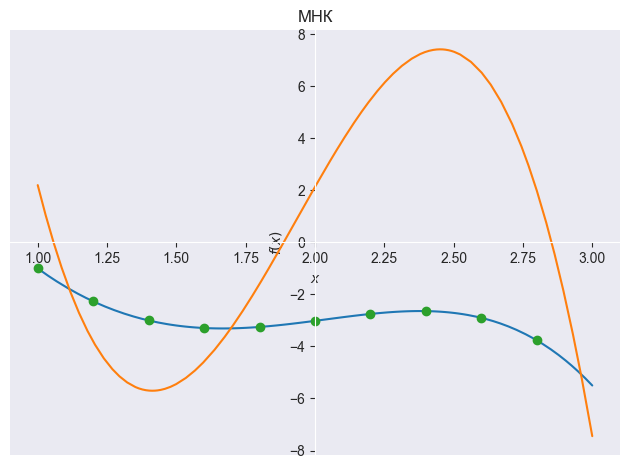

In [160]:
f = 14.6093750000001 - 23.1875000000001*x + 6.66666666666664*x**2 + 1.56250000000000*x**3 - 0.651041666666669*x**4
def get_sympy_subplots(plot:Plot):
    backend = MatplotlibBackend(plot)
    backend.process_series()
    backend.fig.tight_layout()
    return backend.plt
p4 = sp.plot(f, fi, (x, 1, 3), show=False, title='МНК')
plt4 = get_sympy_subplots(p4)
plt4.plot(x4, y4, 'o')
plt4.show()